In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
data_set_name_kaggle=""

train_data_set_name="/Mall_Customers.csv"
test_data_set_name="/Mall_Customers.csv"

import os
import sys


def setup_environment(): # for less manual work when move it from local to colab and kaggle
    """
    environment detection that checks for kaggle, colab and colab at the end
    """
    
    env_info = {
        'environment': 'unknown',
        'is_colab': False,
        'is_kaggle': False,
        'is_local': False,
        'base_path': '',
        'data_path': '',
        'notebook_path': ''
    }
    
    # check for kaggle first  
    kaggle_indicators = [
        'KAGGLE_KERNEL_RUN_TYPE' in os.environ,
        'KAGGLE_URL_BASE' in os.environ,
        '/kaggle/' in os.getcwd(),
        any('kaggle' in path.lower() for path in sys.path),
        os.path.exists('/kaggle')
    ]
    
    if all(kaggle_indicators):
        env_info['environment'] = 'kaggle'
        env_info['is_kaggle'] = True
        env_info['base_path'] = '/kaggle/working'
        env_info['data_path'] = f'/kaggle/input'
        env_info['notebook_path'] = '/kaggle/working'
        print(" Environment: Kaggle Notebook")
    
    # then Colab
    elif 'google.colab' in sys.modules:
        env_info['environment'] = 'google_colab'
        env_info['is_colab'] = True
        env_info['base_path'] = '/content'
        env_info['data_path'] = f'/content/drive/MyDrive/Colab Notebooks/data_sets'
        env_info['notebook_path'] = '/content/drive/MyDrive/Colab Notebooks'
        print(" Environment: Google Colab")
        from google.colab import drive
        drive.mount('/content/drive')
        
    # local system at last
    else:
        env_info['environment'] = 'local_system'
        env_info['is_local'] = True
        env_info['base_path'] = os.getcwd()
        env_info['data_path'] = os.path.join(os.getcwd(), 'data_sets')
        env_info['notebook_path'] = os.getcwd()
        print(" Environment: Local System")
    

    
    return env_info



environment = setup_environment()
print(f"Base path: {environment['base_path']}","\n")
print(f"Data path: {environment['data_path']}")

train_csv_path = environment["data_path"]+train_data_set_name
test_csv_path = environment["data_path"]+test_data_set_name

df_train=pd.read_csv(train_csv_path)
df_test=pd.read_csv(test_csv_path)
if df_train.equals(df_test) :
    print('you only have one dataset. data_test is same as data_train')
    data_train, data_test = train_test_split(df_train,test_size=0.2,random_state=42,shuffle=True) 

else:
    data_train = df_train
    data_test = df_test

# using df_train, because i don't need data_test

 Environment: Local System
Base path: /home/aerf123/my_projects/python/Data_analysis_and_science_&_AI/ml_class_project/classical_ML_class/Colab Notebooks/clustering_mall_customer_dataset 

Data path: /home/aerf123/my_projects/python/Data_analysis_and_science_&_AI/ml_class_project/classical_ML_class/Colab Notebooks/clustering_mall_customer_dataset/data_sets
you only have one dataset. data_test is same as data_train


In [3]:
# all in once in one place, almost

def get_info_as_dataframe(df):
    info = {
        "Column": df.columns,
        "Non-Null Count": df.notna().sum().values,
        "Dtype": df.dtypes.values,
        "Null Count": df.isna().sum().values,
        "data duplicated":df.duplicated().sum()
    }

    return pd.DataFrame(info)

def all_info(data):
    return {
        "head and tail of data": pd.concat([data.head(5), data.tail(5)]),
        "data_describe": data.describe(),
        "data_info": get_info_as_dataframe(data)
    }

data_information = all_info(df_train)

for i in data_information.keys():
    print(40*"^", "\n", i, ":\n", data_information[i], "\n", 40*"-", 3*"\n")




^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ 
 head and tail of data :
      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83 
 ---------------------------------------- 



^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ 
 data_describe :
        CustomerID     

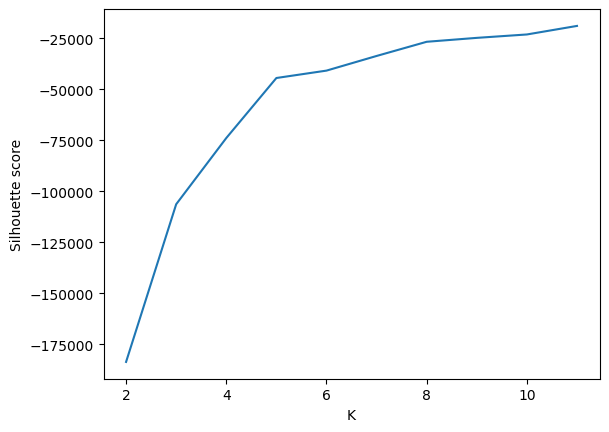

In [4]:
X=df_train.loc[:,["Annual Income (k$)","Spending Score (1-100)"]]
K=range(2,12)
iner=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans=kmeans.fit(X)
    iner_iter = kmeans.score(X, kmeans.labels_)
    iner.append(iner_iter)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.plot(K,iner)

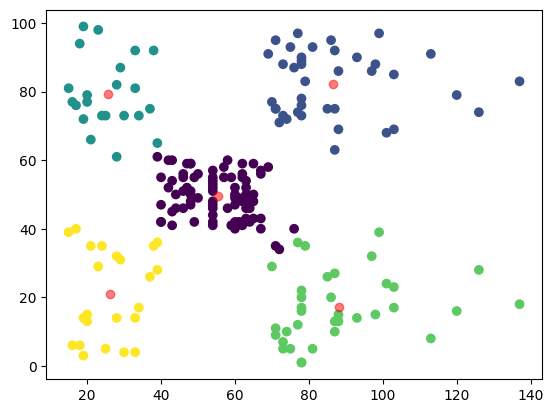

In [5]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans=kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1],c=y_kmeans,)
plt.scatter(centers[:, 0], centers[:, 1], c='red',
alpha=0.5)

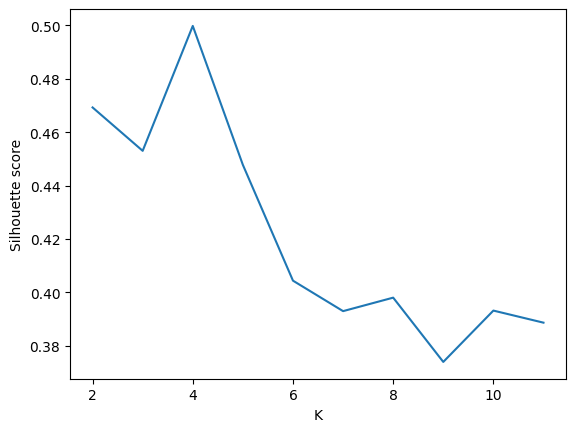

In [6]:
X=df_train.loc[:,["Age","Spending Score (1-100)"]]
K=range(2,12)
Sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans=kmeans.fit(X)
    Sil_iter = silhouette_score(X, kmeans.labels_,random_state=42)
    Sil.append(Sil_iter)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.plot(K,Sil)

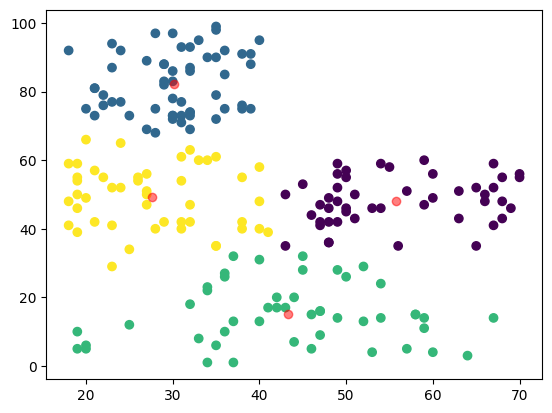

In [7]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans=kmeans.fit(X)
centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1],c=y_kmeans,)
plt.scatter(centers[:, 0], centers[:, 1], c='red',
alpha=0.5)